In [ ]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.preprocessing import load_data
from src.config import RAW_DATA_PATH
from src.logger import logger

pd.set_option('display.max_columns', None)


In [7]:
df = load_data(RAW_DATA_PATH)
logger.info("Datos cargados correctamente para EDA.")
df.head()


2025-04-02 22:18:30,403 [INFO] Datos cargados correctamente para EDA.


,timestamp,temperatura,vibracion,presion,falla
0,2024-01-01 00:00:00,72.48,2.79,28.64,0
1,2024-01-01 01:00:00,69.31,2.77,29.39,0
2,2024-01-01 02:00:00,73.24,2.10,28.81,0
3,2024-01-01 03:00:00,77.62,2.83,30.22,0
4,2024-01-01 04:00:00,68.83,3.37,32.39,0


In [8]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    5000 non-null   object 
 1   temperatura  5000 non-null   float64
 2   vibracion    5000 non-null   float64
 3   presion      5000 non-null   float64
 4   falla        5000 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 195.4+ KB


,temperatura,vibracion,presion,falla
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,70.028004,2.995074,30.021084,0.046800
std,4.982466,0.505234,1.997617,0.211231
min,53.790000,1.040000,23.250000,0.000000
25%,66.710000,2.660000,28.680000,0.000000
50%,70.070000,2.990000,30.020000,0.000000
75%,73.330000,3.340000,31.350000,0.000000
max,89.630000,4.760000,36.860000,1.000000


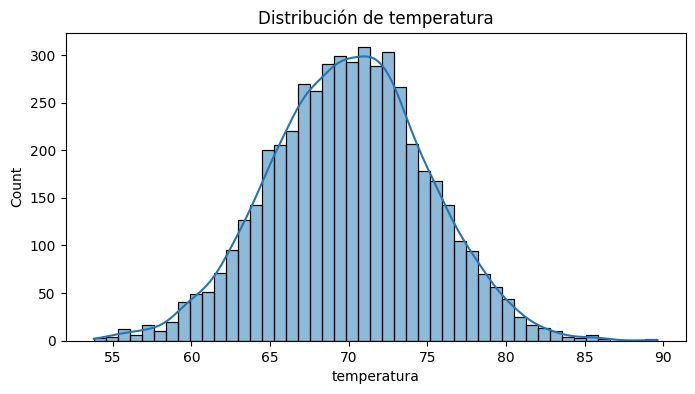

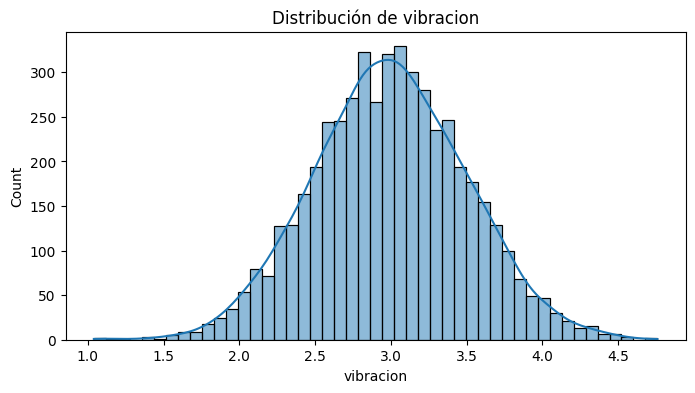

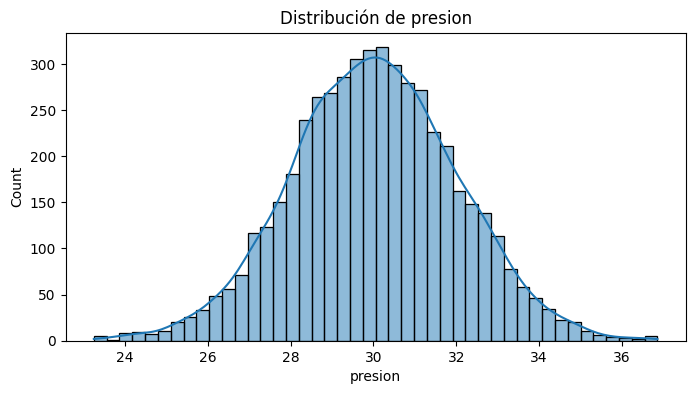

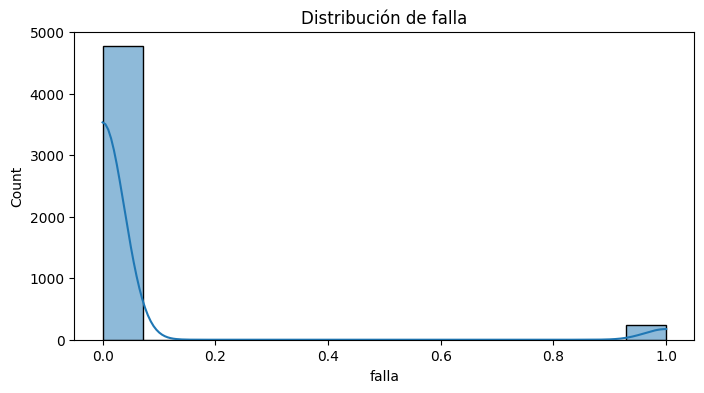

In [9]:
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()


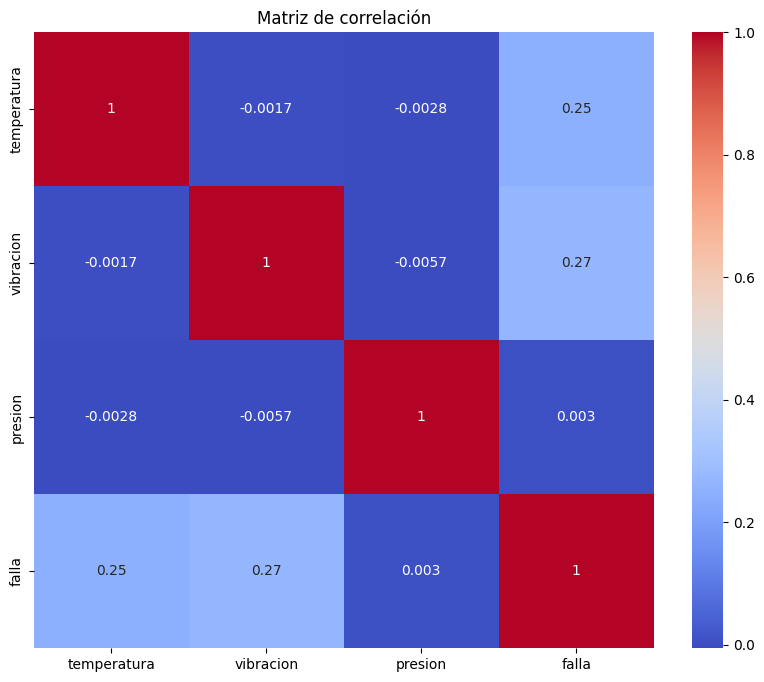

In [11]:
# Seleccionamos solo las columnas numéricas
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()
